Analysis of the data obtained from Bonares

In [31]:
import pandas as pd

In [32]:
bonares = pd.read_csv("output_new_data.csv")

In [33]:
filtered_df = bonares.dropna(ignore_index=True)

In [34]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import json
from collections import Counter

In [35]:
filtered_df.head()

,ID,title,abstract_text_1,abstract_text_2,keywords,publication_year,institute,language
0,53209a68-e177-4d96-bc33-50ab5dcad8de,"AgroFlux – an automated, experimental sensor p...","AgroFlux – an automated, experimental sensor p...","Generally, isolation of scientific disciplines...","Soil, greenhouse gases, sensors, stable isotop...",2025-01-08,Leibniz Centre for Agricultural Landscape Rese...,English
1,03b52930-0210-4bfc-a4ac-75f7544ce7a5,50 years box plot experiment in Grossbeeren (1...,50 years box plot experiment in Grossbeeren (1...,The Box Plot Experiment in Grossbeeren was set...,"horticulture, long-term experiments, vegetable...",2024-08-19,ZALF,English
2,71c0248e-da1a-4115-8ce8-8b314ad1dc70,Westerfeld: Long-term field trial on tillage a...,Westerfeld: Long-term field trial on tillage a...,Table with information about the fungi General...,"Soil, nitrogen fertilizers, tillage, crop rota...",2024-05-06,ZALF,English
3,0608c61a-7831-44d3-8671-2624a2720d95,Westerfeld: Long-term field trial on tillage a...,Westerfeld: Long-term field trial on tillage a...,Table with information about the bacteria Gene...,"Soil, nitrogen fertilizers, tillage, crop rota...",2024-05-06,ZALF,English
4,6b82aab4-1e9b-4307-902f-9428aeb53b38,Westerfeld: Long-term field trial on tillage a...,Westerfeld: Long-term field trial on tillage a...,Table with information about the BioPoject in ...,"Soil, nitrogen fertilizers, tillage, crop rota...",2024-05-06,ZALF,English


In [36]:
filtered_df['language'].value_counts().reset_index()

,language,count
0,English,1033


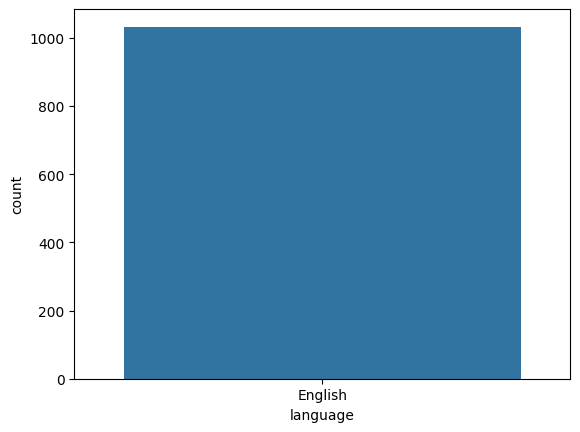

In [37]:
# define Seaborn color palette to use 
sns.barplot(x="language",
           y="count",
           data=filtered_df['language'].value_counts().reset_index())
# displaying chart 
plt.show()

C:\Users\husain\AppData\Local\Temp\ipykernel_13204\825218627.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


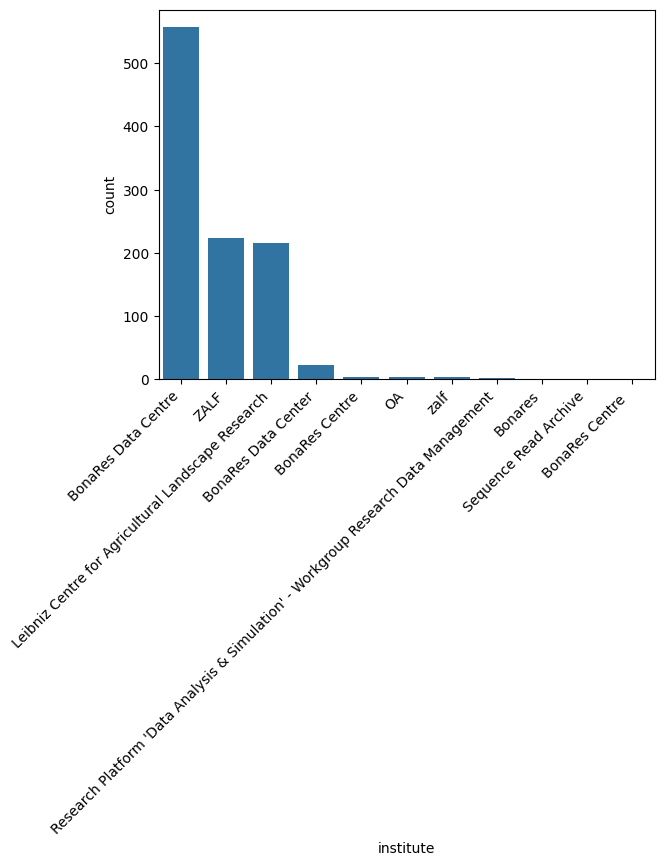

In [38]:
# define Seaborn color palette to use 
sns.barplot(x="institute",
           y="count",
           data=filtered_df['institute'].value_counts().reset_index())

plt.xticks(rotation=45, ha='right')  

plt.tight_layout()  

plt.show()


In [39]:
filtered_df['institute'].value_counts().reset_index()

,institute,count
0,BonaRes Data Centre,557
1,ZALF,223
2,Leibniz Centre for Agricultural Landscape Rese...,215
3,BonaRes Data Center,23
4,BonaRes Centre,4
5,OA,3
6,zalf,3
7,Research Platform 'Data Analysis & Simulation'...,2
8,Bonares,1
9,Sequence Read Archive,1


In [40]:
from SPARQLWrapper import SPARQLWrapper, JSON

def keywords_from_agrovoc():


    # Define the SPARQL endpoint
    sparql_endpoint = "https://agrovoc.fao.org/sparql"

    # Define the SPARQL query
    query = """
    PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
    PREFIX skosxl: <http://www.w3.org/2008/05/skos-xl#>
    SELECT DISTINCT ?hierarchicalType ?otherConcept ?label
    WHERE { 
      {
        BIND(<http://aims.fao.org/aos/agrovoc/c_1972> AS ?concept)
        ?concept skos:narrower ?otherConcept .
        BIND("narrower" AS ?hierarchicalType)
      }
      UNION
      {
        BIND(<http://aims.fao.org/aos/agrovoc/c_7156> AS ?concept)
        ?concept skos:narrower ?otherConcept .
        BIND("narrower" AS ?hierarchicalType)
      }
      UNION
      {
        BIND(<http://aims.fao.org/aos/agrovoc/c_5993> AS ?concept)
        ?concept skos:narrower ?otherConcept .
        BIND("narrower" AS ?hierarchicalType)
      }
      UNION
      {
        BIND(<http://aims.fao.org/aos/agrovoc/c_8171> AS ?concept)
        ?concept skos:narrower ?otherConcept .
        BIND("narrower" AS ?hierarchicalType)

      }
      OPTIONAL { 
        ?otherConcept skosxl:prefLabel/skosxl:literalForm ?label.
      }
      FILTER(langMatches(lang(?label), 'en') || langMatches(lang(?label), 'de'))
    }
    """

    # Set up the SPARQL wrapper
    sparql = SPARQLWrapper(sparql_endpoint)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    soil_crop_list = []
    # Execute the query and fetch the results
    try:
        results = sparql.query().convert()
        print("Query executed successfully.")

        # Print results in a readable format
        for result in results["results"]["bindings"]:
            hierarchical_type = result.get("hierarchicalType", {}).get("value", "")
            other_concept = result.get("otherConcept", {}).get("value", "")
            label = result.get("label", {}).get("value", "")
            soil_crop_list.append(label)


    except Exception as e:
        print(f"An error occurred: {e}")
    return soil_crop_list

In [41]:
import requests

# Function to get relatives for a given concept URI
def fetch_relatives(concept_uri):
    relatives_url = "https://www.eionet.europa.eu/gemet/getAllConceptRelatives"
    response = requests.get(relatives_url, params={"concept_uri": concept_uri})
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching relatives for {concept_uri}: {response.status_code}")
        return []

# Function to get translations for a concept URI
def fetch_translations(concept_uri):
    translations_url = "https://www.eionet.europa.eu/gemet/getAllTranslationsForConcept"
    params = {
        "concept_uri": concept_uri,
        "property_uri": "http://www.w3.org/2004/02/skos/core#prefLabel",
    }
    response = requests.get(translations_url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching translations for {concept_uri}: {response.status_code}")
        return []

# Function to extract labels for 'en' and 'de'
def extract_labels(translations):
    labels = []
    for translation in translations:
        lang = translation.get("language")
        value = translation.get("string")
        if lang in ["en", "de"]:  # Filter by desired languages
            labels.append(value)
            print(value)
    return labels

# Main recursive exploration logic
def explore_concepts_with_labels(start_uri):
    visited = set()  # Track visited URIs
    queue = [start_uri]  # BFS queue
    labels_list = []  # Store labels for all concepts


    try:
        while queue:
            current_uri = queue.pop(0)  # Dequeue a concept URI

            if current_uri in visited:
                continue  # Skip if already visited

            # Mark as visited
            visited.add(current_uri)

            # Fetch and process translations
            translations = fetch_translations(current_uri)
            labels = extract_labels(translations)
            labels_list.extend(labels)  # Append labels to the main list

            # Fetch relatives and enqueue their URIs
            relatives = fetch_relatives(current_uri)
            for relative in relatives:
                target_uri = relative.get("target")
                if target_uri and target_uri not in visited:
                    queue.append(target_uri)
    except KeyboardInterrupt:
        print("Execution interrupted. Returning progress...")
        return labels_list

    return labels_list

# Starting concept URI
start_concept_uri_1 = "http://www.eionet.europa.eu/gemet/concept/7843"
start_concept_uri_2 = "http://www.eionet.europa.eu/gemet/en/concept/6298"

# Execute the exploration
labels = explore_concepts_with_labels(start_concept_uri_1)
labels.extend(explore_concepts_with_labels(start_concept_uri_2))

# Print all collected preferred labels
print("Preferred Labels:")
print(f"Length of labels are : {len(labels)}")
for label in labels:
    print(label)


Boden
soil
Pedosphäre
pedosphere
LITHOSPHÄRE, BÖDEN
LITHOSPHERE (soil, geological processes)
Bodenfunktion
soil function
Bodenluft
soil air
Bodennutzbarkeit
soil capability
Bodenprofil
soil profile
Bodenstruktur
soil structure
Bodentextur
soil texture
Bodenart
soil type
Bodenwasser
soil water
Salzgehalt des Bodens
soil salinity
Land
land
Bodenuntersuchung
soil analysis
Bodenressourcen
soil resource
Boden
soil
soil biodiversity
Bodenprozeß
soil process
NATÜRLICHE UND ANTHROPOGEN ÜBERFORMTE UMWELT
NATURAL ENVIRONMENT, ANTHROPIC ENVIRONMENT
Alkalischer Boden
alkali land
Alkalischer Boden
alkali soil
Anschwemmung
alluvion
Asbest
asbestos
Bitumen
bitumen
Bradyseismus
bradyseism
Lehm
clay
Verunreinigter Boden
contaminated soil
Festlandsockel
continental shelf
Tiefseeablagerung
deep sea deposit
Erdkruste
earth's crust
Erdbeben
earthquake
Geologischer Prozess
geological process
Kies
gravel
Humus
humus
Aufnahmekapazität des Bodens
land carrying capacity
Kalkstein
limestone
Lithosphäre
lithosphe

In [42]:
soil_crop_list = keywords_from_agrovoc()
soil_crop_list.append("Boden")
soil_crop_list = [keyword.lower() for keyword in soil_crop_list]
if 'Landwirtschaft'.lower in soil_crop_list:
    print("Keyword is present!")
else:
    print("Keyword is not present.")
soil_crop_list.append('Landwirtschaft'.lower())
print(soil_crop_list)

Query executed successfully.
Keyword is not present.
['legumes', 'leguminose', 'körnerfrucht', 'grain crops', 'genussmittelpflanze', 'stimulant crops', 'schattenspendende pflanze', 'shade plants', 'gewürzpflanze', 'spice crops', 'bienentrachtpflanze', 'bee plants', 'kalebasse', 'calabash crops', 'marktfrucht', 'cash crops', 'bodendeckerpflanze', 'cover plants', 'schutzpflanze', 'protective plants', 'erosionsschutzpflanze', 'erosion control plants', 'wurzelfrucht', 'root crops', 'lebensmittelpflanze', 'food crops', 'heckenpflanze', 'hedging plants', 'industriepflanze', 'industrial crops', 'rekultivierungspflanze', 'revegetation plants', 'unterlage (pflanze)', 'rootstock crops', 'salatpflanze', 'salad crops', 'samenpflanze', 'seed crops', 'pionierpflanze', 'soil reclamation plants', 'äsungspflanze', 'browse plants', 'weidepflanze', 'herbage crops', 'feldfrucht', 'field crops', 'plantagenpflanze', 'plantation crops', 'winterfrucht', 'winter crops', 'sommerfrucht', 'spring crops', 'begleit

In [43]:
print(filtered_df['keywords'])

0       Soil, greenhouse gases, sensors, stable isotop...
1       horticulture, long-term experiments, vegetable...
2       Soil, nitrogen fertilizers, tillage, crop rota...
3       Soil, nitrogen fertilizers, tillage, crop rota...
4       Soil, nitrogen fertilizers, tillage, crop rota...
                              ...                        
1028    Vesicular arbuscular mycorrhizae, Symbionts, E...
1029    Soil, Mineral nutrients, Lignite, Land resourc...
1030                                Soil, opendata, Boden
1031    wheat, agricultural landscape, kettle holes, w...
1032    Soil, opendata, Boden, phosphorus, organic fer...
Name: keywords, Length: 1033, dtype: object


In [44]:
def contains_keywords(row, soil_crop_list):
    # Split the 'keywords' string into a list
    keywords_list = row['keywords'].split(',')
    keywords_list = [keyword.lower() for keyword in keywords_list]
    # Check if any keyword matches the soil_crop_list
    return any(keyword.strip() in soil_crop_list for keyword in keywords_list)

def filter_and_count(df, soil_crop_list):
    # Add a new column to indicate rows containing soil or crop keywords
    df['contains_soil_or_crop'] = df.apply(lambda row: contains_keywords(row, soil_crop_list), axis=1)
    # Filter rows that match
    filtered_df = df[df['contains_soil_or_crop']]
    # Count the filtered rows
    count = len(filtered_df)
    return count, filtered_df


In [45]:
print(f"Length of labels are : {len(labels)}")


Length of labels are : 11075


In [46]:
count, filtered_df_soil_crop_gemet = filter_and_count(filtered_df, labels)
num_rows = len(filtered_df_soil_crop_gemet)
print(f"Number of rows in filtered_df_soil_crop_gemet: {num_rows}")

print("Count of rows containing keywords:", count)
print("Filtered DataFrame:")
print(filtered_df_soil_crop_gemet)

Number of rows in filtered_df_soil_crop_gemet: 965
Count of rows containing keywords: 965
Filtered DataFrame:
                                        ID  \
0     53209a68-e177-4d96-bc33-50ab5dcad8de   
1     03b52930-0210-4bfc-a4ac-75f7544ce7a5   
2     71c0248e-da1a-4115-8ce8-8b314ad1dc70   
3     0608c61a-7831-44d3-8671-2624a2720d95   
4     6b82aab4-1e9b-4307-902f-9428aeb53b38   
...                                    ...   
1028  13ca5aa2-1f0f-4b5f-b492-145db9dd376c   
1029  9d477f07-9206-425d-bc3f-7d9c18b5f0a2   
1030  54ecbb64-7cc4-46d2-957d-d37e957daf98   
1031  5a05411c-cb3f-4725-b7d9-ebf23b1767ec   
1032  a3505f42-b0e3-4fd1-819a-6effaf8c3a3a   

                                                  title  \
0     AgroFlux – an automated, experimental sensor p...   
1     50 years box plot experiment in Grossbeeren (1...   
2     Westerfeld: Long-term field trial on tillage a...   
3     Westerfeld: Long-term field trial on tillage a...   
4     Westerfeld: Long-term field trial on

C:\Users\husain\AppData\Local\Temp\ipykernel_13204\3934690477.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contains_soil_or_crop'] = df.apply(lambda row: contains_keywords(row, soil_crop_list), axis=1)


In [17]:
count, filtered_df_soil_crop = filter_and_count(filtered_df, soil_crop_list)

print("Count of rows containing keywords:", count)
print("Filtered DataFrame:")
print(filtered_df_soil_crop)

C:\Users\husain\AppData\Local\Temp\ipykernel_13204\3934690477.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contains_soil_or_crop'] = df.apply(lambda row: contains_keywords(row, soil_crop_list), axis=1)


Count of rows containing keywords: 944
Filtered DataFrame:
                                        ID  \
0     53209a68-e177-4d96-bc33-50ab5dcad8de   
1     03b52930-0210-4bfc-a4ac-75f7544ce7a5   
2     71c0248e-da1a-4115-8ce8-8b314ad1dc70   
3     0608c61a-7831-44d3-8671-2624a2720d95   
4     6b82aab4-1e9b-4307-902f-9428aeb53b38   
...                                    ...   
1027  f2b5ef5b-dc62-435d-a131-80efc016d54b   
1028  13ca5aa2-1f0f-4b5f-b492-145db9dd376c   
1029  9d477f07-9206-425d-bc3f-7d9c18b5f0a2   
1030  54ecbb64-7cc4-46d2-957d-d37e957daf98   
1032  a3505f42-b0e3-4fd1-819a-6effaf8c3a3a   

                                                  title  \
0     AgroFlux – an automated, experimental sensor p...   
1     50 years box plot experiment in Grossbeeren (1...   
2     Westerfeld: Long-term field trial on tillage a...   
3     Westerfeld: Long-term field trial on tillage a...   
4     Westerfeld: Long-term field trial on tillage a...   
...                               

In [18]:
# Check data types of each column
print("Column Data Types:")
print(filtered_df.dtypes)
print(filtered_df['publication_year'])


Column Data Types:
ID                       object
title                    object
abstract_text_1          object
abstract_text_2          object
keywords                 object
publication_year         object
institute                object
language                 object
contains_soil_or_crop      bool
dtype: object
0                   2025-01-08
1                   2024-08-19
2                   2024-05-06
3                   2024-05-06
4                   2024-05-06
                 ...          
1028                2020-07-16
1029                2019-03-27
1030                2020-02-20
1031                2021-08-04
1032    2019-08-19, 2019-03-21
Name: publication_year, Length: 1033, dtype: object


In [19]:
def filter_by_year(df, start_year, end_year):
    """
    Filters the DataFrame to only include rows where the publication year is within a specified range.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        start_year (int): The start year for filtering (inclusive).
        end_year (int): The end year for filtering (exclusive).

    Returns:
        pd.DataFrame: The filtered DataFrame.
    """
    # Handle multiple dates by extracting the first date
    df['publication_year'] = df['publication_year'].str.strip().str.split(',').str[0]
    
    # Convert to datetime with flexible parsing
    df['publication_year'] = pd.to_datetime(df['publication_year'], errors='coerce', format="%Y-%m-%d")

    # Debug: Check the parsed dates
    print("Parsed publication_year column:")
    print(df[['publication_year']])

    # Filter rows with valid dates in the specified year range
    filtered_df = df[(df['publication_year'].notna()) &
                     (df['publication_year'].dt.year > start_year) &
                     (df['publication_year'].dt.year < end_year)]

    # Debug: Check the filtered DataFrame
    print("Filtered DataFrame based on year range:")
    print(filtered_df)

    return filtered_df


In [20]:
year_filtered_df = filter_by_year(filtered_df, 2018, 2026)
print(year_filtered_df)

Parsed publication_year column:
     publication_year
0          2025-01-08
1          2024-08-19
2          2024-05-06
3          2024-05-06
4          2024-05-06
...               ...
1028       2020-07-16
1029       2019-03-27
1030       2020-02-20
1031       2021-08-04
1032       2019-08-19

[1033 rows x 1 columns]
Filtered DataFrame based on year range:
                                        ID  \
0     53209a68-e177-4d96-bc33-50ab5dcad8de   
1     03b52930-0210-4bfc-a4ac-75f7544ce7a5   
2     71c0248e-da1a-4115-8ce8-8b314ad1dc70   
3     0608c61a-7831-44d3-8671-2624a2720d95   
4     6b82aab4-1e9b-4307-902f-9428aeb53b38   
...                                    ...   
1028  13ca5aa2-1f0f-4b5f-b492-145db9dd376c   
1029  9d477f07-9206-425d-bc3f-7d9c18b5f0a2   
1030  54ecbb64-7cc4-46d2-957d-d37e957daf98   
1031  5a05411c-cb3f-4725-b7d9-ebf23b1767ec   
1032  a3505f42-b0e3-4fd1-819a-6effaf8c3a3a   

                                                  title  \
0     AgroFlux – an automat

C:\Users\husain\AppData\Local\Temp\ipykernel_13204\1534508694.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publication_year'] = df['publication_year'].str.strip().str.split(',').str[0]
C:\Users\husain\AppData\Local\Temp\ipykernel_13204\1534508694.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publication_year'] = pd.to_datetime(df['publication_year'], errors='coerce', format="%Y-%m-%d")


In [21]:
filtered_df_soil_crop_year = filter_by_year(filtered_df_soil_crop, 2018, 2026)
print("Filtered DataFrame by year:")
print(filtered_df_soil_crop_year)

Parsed publication_year column:
     publication_year
0          2025-01-08
1          2024-08-19
2          2024-05-06
3          2024-05-06
4          2024-05-06
...               ...
1027       2018-05-17
1028       2020-07-16
1029       2019-03-27
1030       2020-02-20
1032       2019-08-19

[944 rows x 1 columns]
Filtered DataFrame based on year range:
                                        ID  \
0     53209a68-e177-4d96-bc33-50ab5dcad8de   
1     03b52930-0210-4bfc-a4ac-75f7544ce7a5   
2     71c0248e-da1a-4115-8ce8-8b314ad1dc70   
3     0608c61a-7831-44d3-8671-2624a2720d95   
4     6b82aab4-1e9b-4307-902f-9428aeb53b38   
...                                    ...   
1026  f6a60156-1358-4288-9ed7-91ed0c54321b   
1028  13ca5aa2-1f0f-4b5f-b492-145db9dd376c   
1029  9d477f07-9206-425d-bc3f-7d9c18b5f0a2   
1030  54ecbb64-7cc4-46d2-957d-d37e957daf98   
1032  a3505f42-b0e3-4fd1-819a-6effaf8c3a3a   

                                                  title  \
0     AgroFlux – an automate

C:\Users\husain\AppData\Local\Temp\ipykernel_13204\1534508694.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publication_year'] = df['publication_year'].str.strip().str.split(',').str[0]
C:\Users\husain\AppData\Local\Temp\ipykernel_13204\1534508694.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publication_year'] = pd.to_datetime(df['publication_year'], errors='coerce', format="%Y-%m-%d")


In [ ]:
filtered_df_soil_crop_year_LTE = filtered_df_soil_crop_year[filtered_df_soil_crop_year.apply(lambda row: row.astype(str).str.contains('LTE', case=False).any(), axis=1)]
year_filtered_df_LTE = year_filtered_df[year_filtered_df.apply(lambda row: row.astype(str).str.contains('LTE', case=False).any(), axis=1)]






num_rows = len(bonares)
print(f"Number of rows in bonares: {num_rows}")

num_rows = len(filtered_df)
print(f"Number of rows in filtered_df: {num_rows}")

num_rows = len(filtered_df_soil_crop)
print(f"Number of rows in filtered_df_soil_crop: {num_rows}")


num_rows = len(filtered_df_soil_crop_year)
print(f"Number of rows in filtered_df_soil_crop_year: {num_rows}")

num_rows = len(filtered_df_soil_crop_year_LTE)
print(f"Number of rows in filtered_df_soil_crop_year_LTE: {num_rows}")

num_rows = len(year_filtered_df)
print(f"Number of rows in year_filtered_df: {num_rows}")

num_rows = len(year_filtered_df_LTE)
print(f"Number of rows in year_filtered_df_LTE: {num_rows}")





Number of rows in bonares: 1150
Number of rows in filtered_df: 1033
Number of rows in filtered_df_soil_crop: 944
Number of rows in filtered_df_soil_crop_year: 841
Number of rows in filtered_df_soil_crop_year_LTE: 217
Number of rows in year_filtered_df: 915
Number of rows in year_filtered_df_LTE: 223


In [47]:
filtered_df_soil_crop_year.to_csv("filtered_df_soil_crop_year.csv", index=False)  # Removes the index column


In [23]:
def plot_text_length_distribution(df, text_column, bins=10, color='blue'):
    
    # Set up the figure size for the plot
    plt.figure(figsize=(10, 6))

    # Plot the distribution of text lengths directly using apply() within sns.histplot
    sns.histplot(df[text_column].apply(lambda x: len(x.split(' '))), kde=True, color=color, bins=bins)

    # Add labels and title
    plt.title('Distribution of Text Lengths', fontsize=16)
    plt.xlabel('Text Length (Number of Words)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Display the plot
    plt.show()

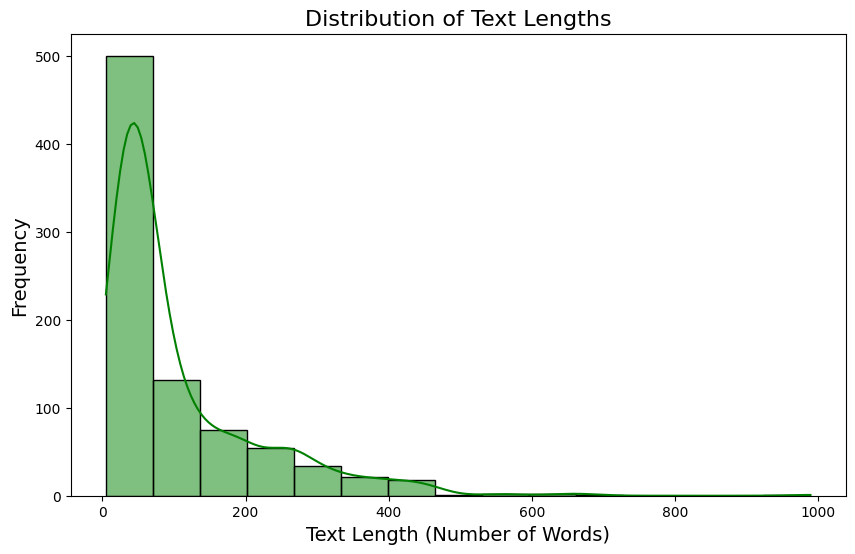

In [24]:
plot_text_length_distribution(filtered_df_soil_crop_year, 'abstract_text_2', bins=15, color='green')

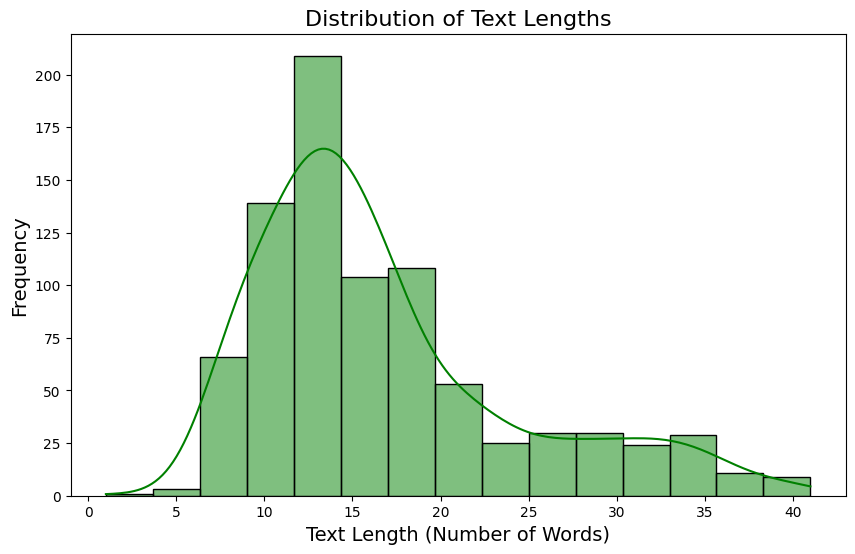

In [25]:
plot_text_length_distribution(filtered_df_soil_crop_year, 'abstract_text_1', bins=15, color='green')

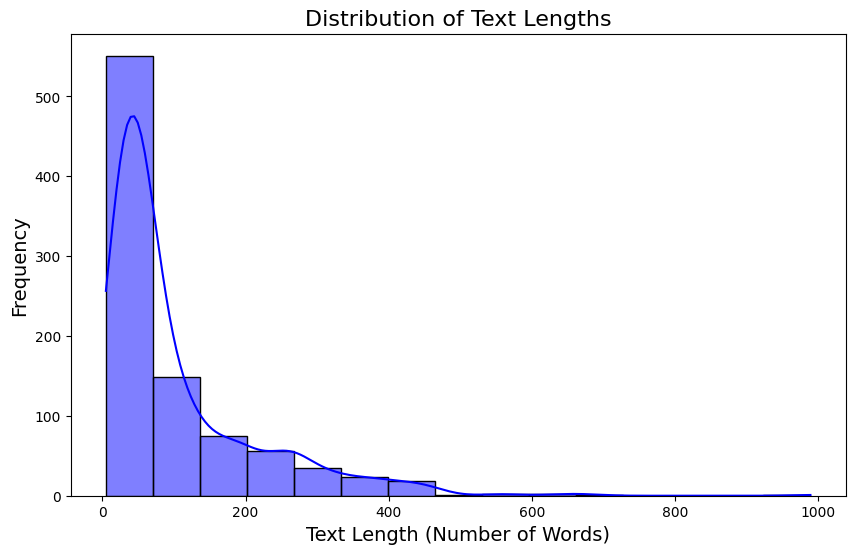

In [26]:
plot_text_length_distribution(year_filtered_df, 'abstract_text_2', bins=15, color='blue')

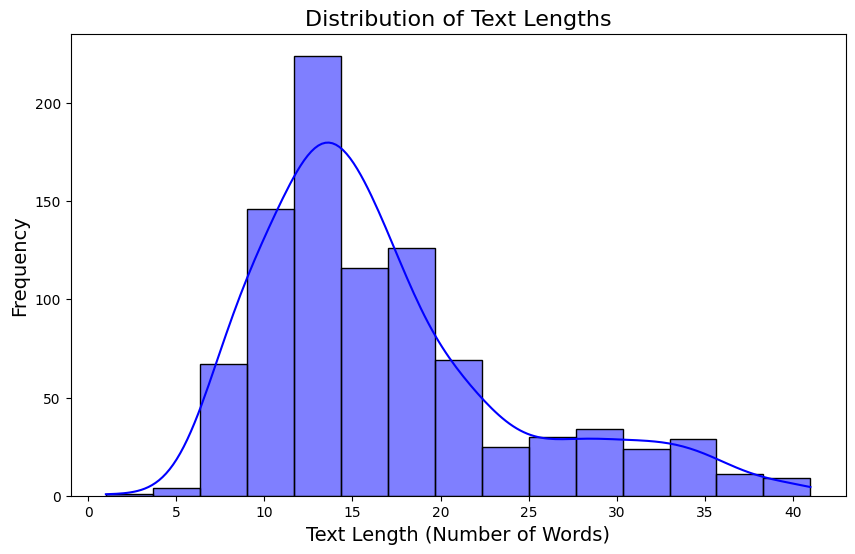

In [27]:
plot_text_length_distribution(year_filtered_df, 'abstract_text_1', bins=15, color='blue')

In [28]:
def most_common_keywords(df, keywords_column, top_n=10):
    """
    Prints the most common keywords from the specified column, where each row
    may contain a string of keywords separated by commas or a list of keywords.

    Parameters:
    - df: The DataFrame containing the data.
    - keywords_column: The name of the column containing the keywords (either as a comma-separated string or a list of strings).
    - top_n: The number of top common keywords to display (default is 10).
    """
    all_keywords = []

    for row in df[keywords_column]:
        # Check if the row is a string (comma-separated keywords)
        if isinstance(row, str):
            keywords = row.split(',')  # Split by commas
            all_keywords.extend(keyword.strip() for keyword in keywords)  # Strip spaces and add to list
        # Check if the row is a list of strings
        elif isinstance(row, list):
            all_keywords.extend(row)  # Directly add the list of keywords

    # Count the occurrences of each keyword
    keyword_counts = Counter(all_keywords)

    # Get the most common keywords
    common_keywords = keyword_counts.most_common(top_n)

    # Print the results
    print(f"Top {top_n} most common keywords:")
    for keyword, count in common_keywords:
        print(f"{keyword}: {count}")

In [29]:
most_common_keywords(year_filtered_df, 'keywords', top_n=10)

Top 10 most common keywords:
Boden: 912
opendata: 832
Soil: 610
Germany: 226
Langzeitversuch: 214
agriculture: 163
long-term experiments: 160
Brandenburg: 158
crop rotation: 148
Landwirtschaft: 119


In [30]:
most_common_keywords(filtered_df_soil_crop_year, 'keywords', top_n=10)

Top 10 most common keywords:
Boden: 912
opendata: 764
Soil: 600
Langzeitversuch: 214
Germany: 174
long-term experiments: 160
agriculture: 159
crop rotation: 148
Brandenburg: 119
Landwirtschaft: 119
